In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from matplotlib.ticker import MaxNLocator

from nanosce_cv_cc import Ec

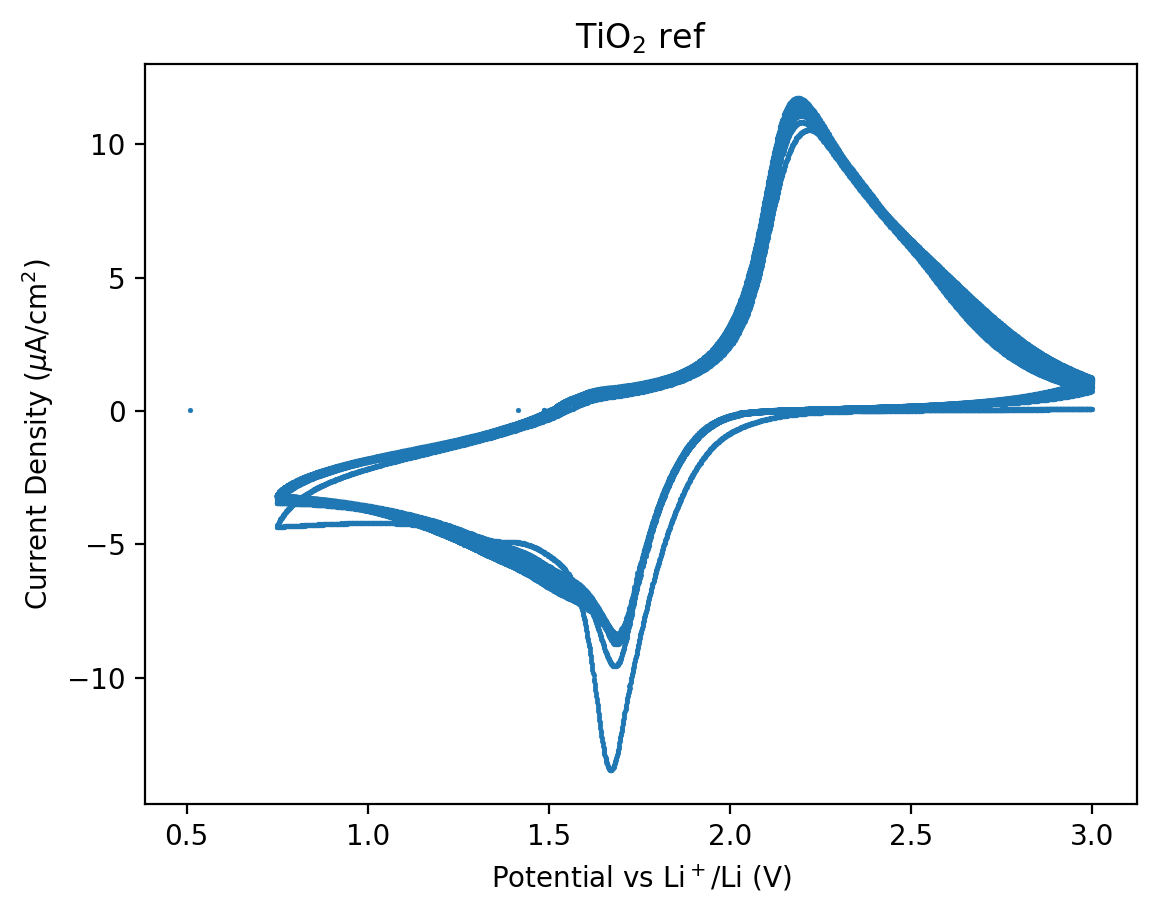

<Figure size 640x480 with 0 Axes>

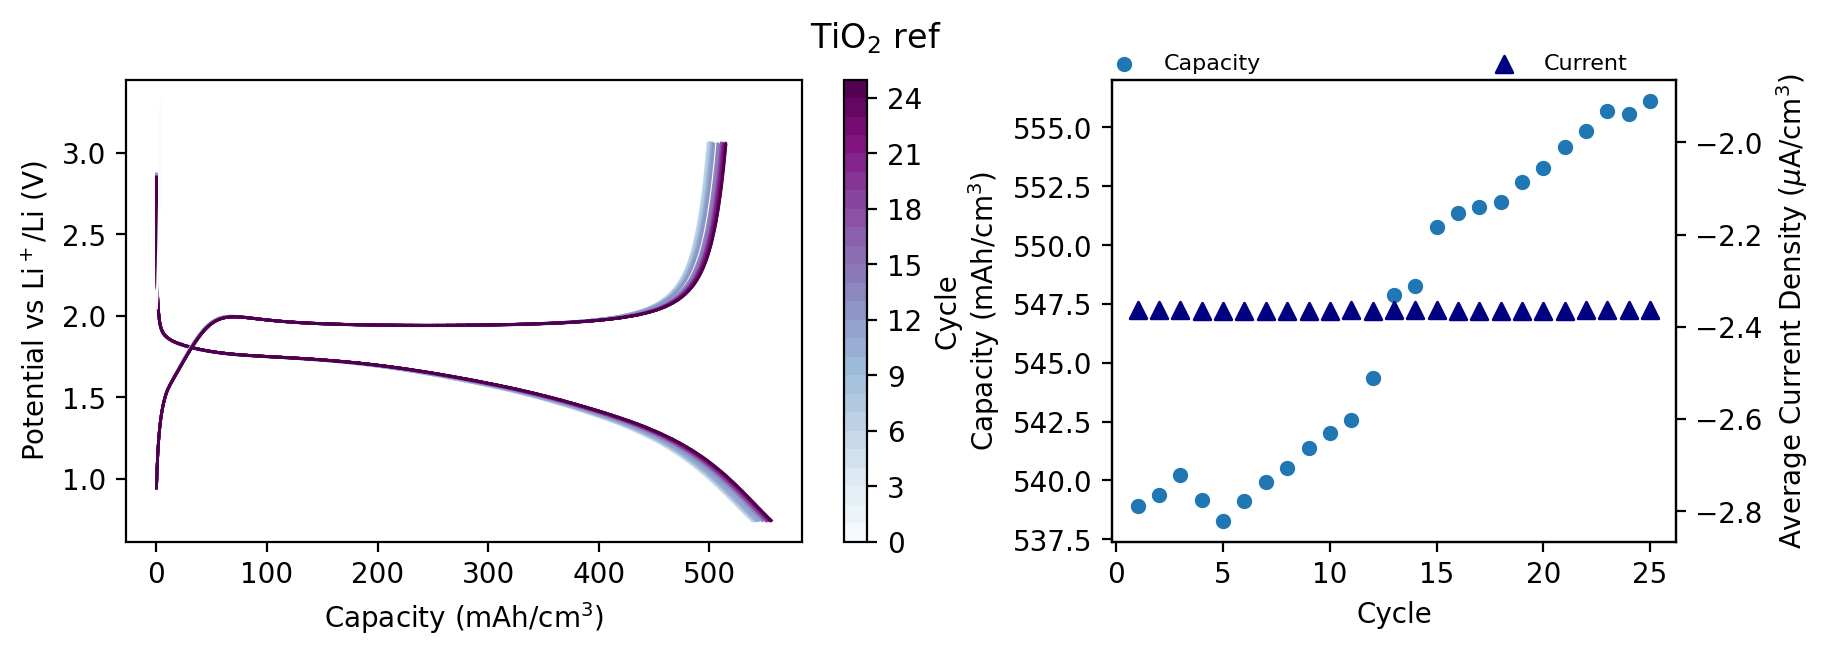

In [2]:
# =============================== TiO2 Reference ==============================================================================================
path_ref = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\TiO2ref'
df_cv_ref, capacity, lith, delith = Ec.Electrochem(path_ref, 40, 0.63, 'TiO$_2$ ref')

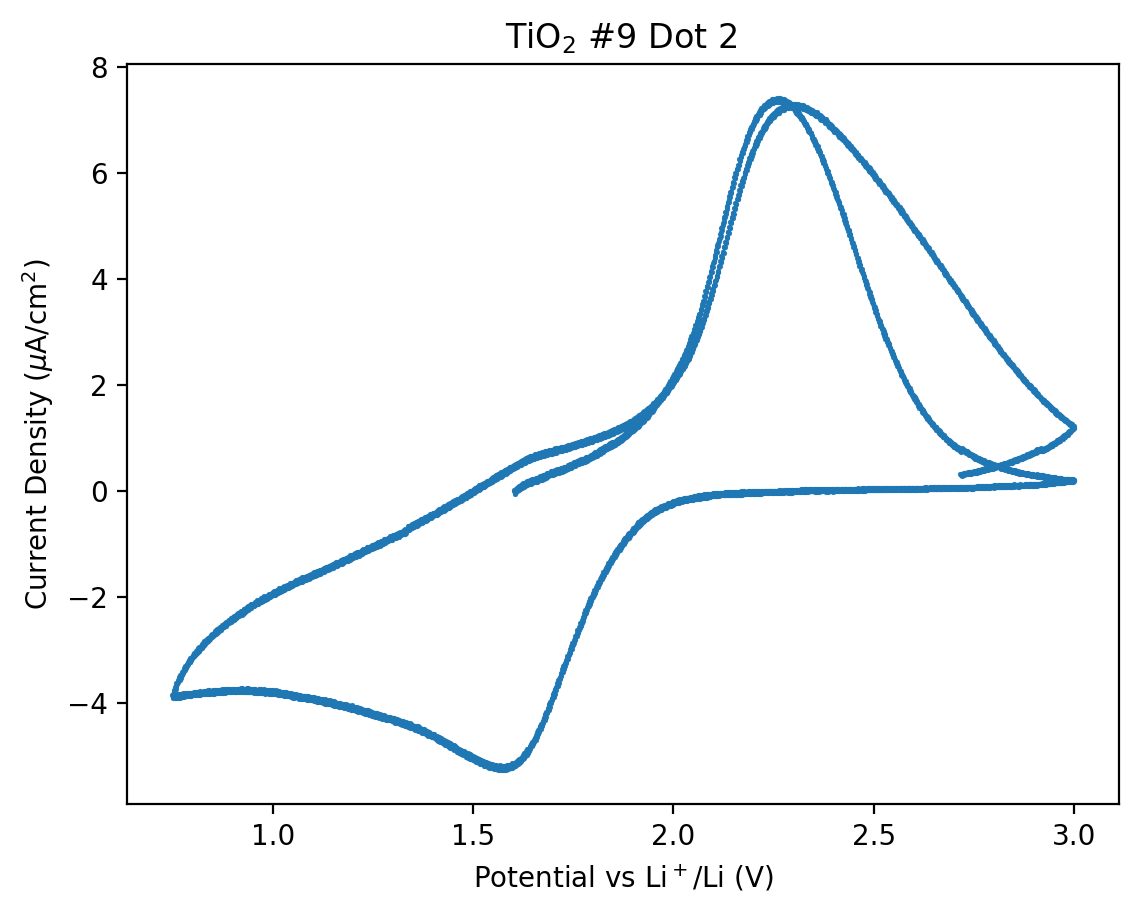

<Figure size 640x480 with 0 Axes>

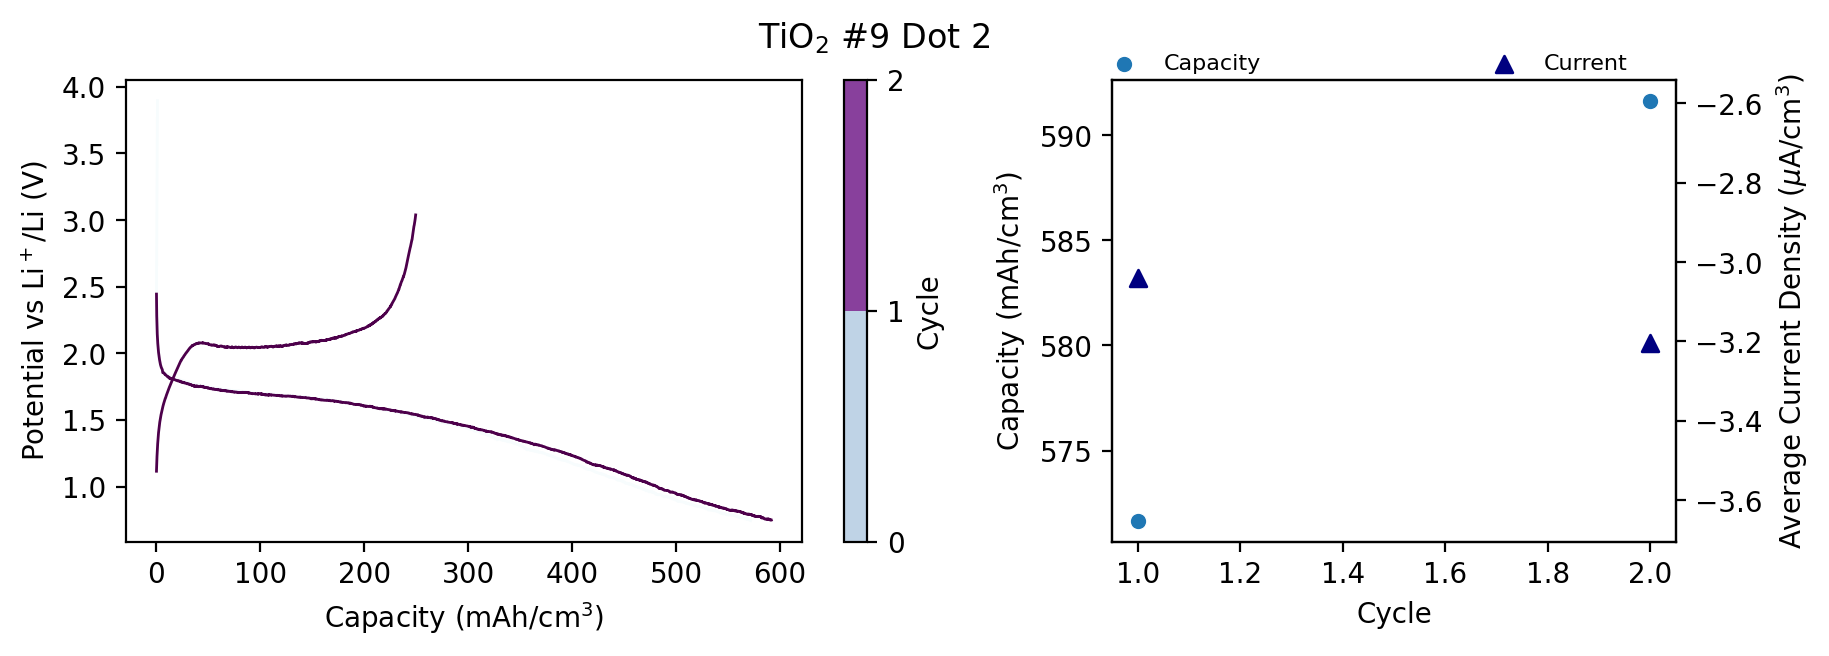

In [3]:
# =============================== TiO2 NanoSCE ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\SCE Tio2\Dot2\CV 8 dot 2 (abused) charge discharge'
sample = 'TiO$_2$ #9 Dot 2 '
df_cv_9, capacity_9, lith_9, delith_9 = Ec.Electrochem(path, 40, 0.12566, sample)

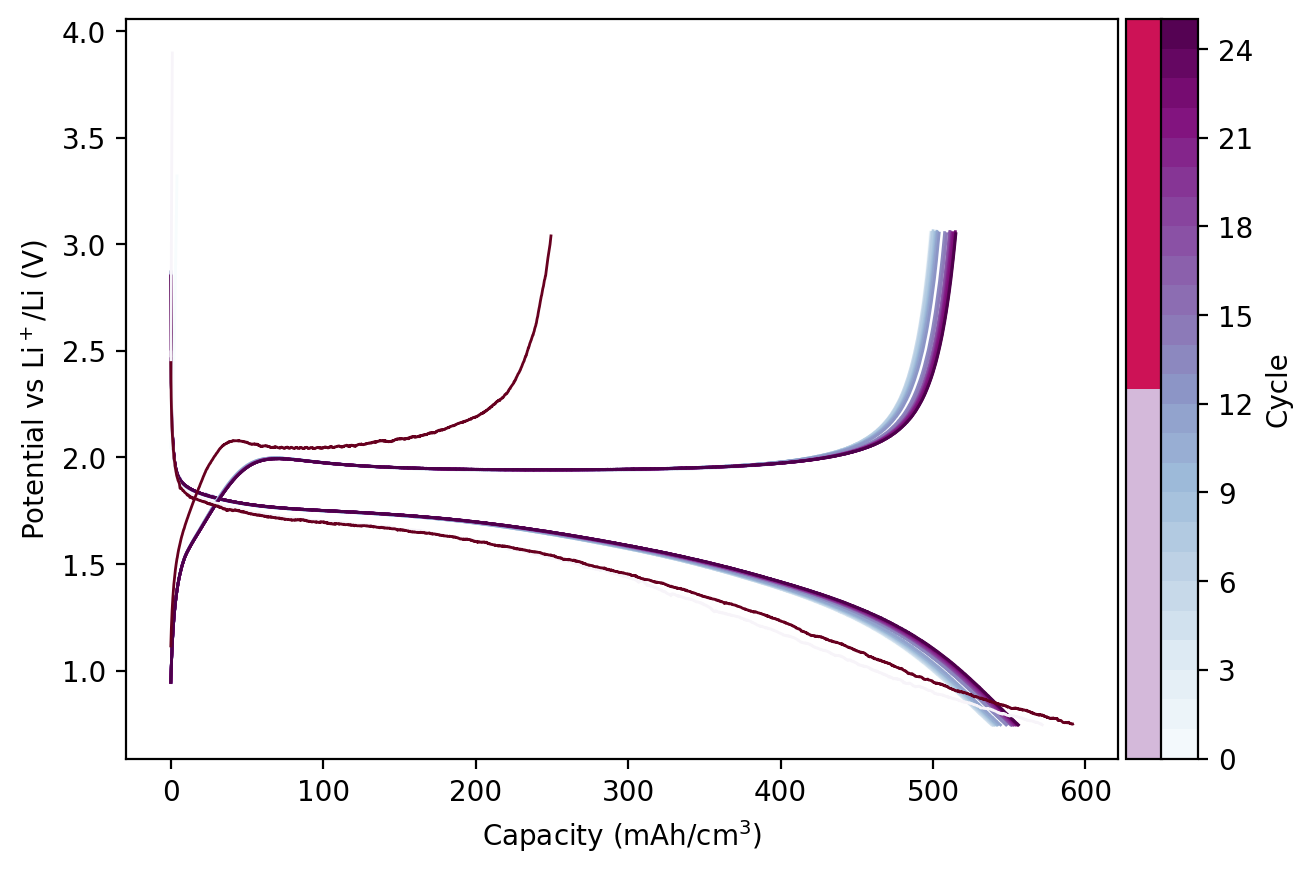

In [37]:
# ========================================= COMPARISON =========================================
samples = [df_cv_ref, df_cv_9]
palette = 'BuPu'
p2 = 'PuRd'
df_cv_ref['Sample'] = 'Wet Cell'
df_cv_9['Sample'] = 'Solid Electrolyte'
df = pd.concat([df_cv_ref, df_cv_9])

fig, ax = plt.subplots(dpi = 200)
Z = [[0,0],[0,0]]                                                                       # Creates color bar
cbar = plt.contourf(Z, levels = np.arange(0, 3, 1), cmap=p2)
cbar2 = plt.contourf(Z, levels = np.arange(0, 26, 1), cmap=palette)
plt.clf()


# sns.scatterplot(data = df, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', edgecolor = None, s =3, hue = 'Sample')
# plt.xlim(0.5, 3.25)
sns.lineplot(data = lith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
sns.lineplot(data = delith, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = palette, lw = 1, legend = False)
sns.lineplot(data = lith_9, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)
sns.lineplot(data = delith_9, x = 'Capacity (mAh/cm$^3$)', y = 'Potential vs Li$^+$/Li (V)', hue = 'Cycle', palette = p2, lw = 1, legend = False)

cb = plt.colorbar(cbar, anchor = (1.4,0)).set_ticks([])
cb2 = plt.colorbar(cbar2, anchor = (4.4,0)).set_label('Cycle')

# plt.colorbar(cbar2)
# lith
# plt.show().set_label('Cycle')

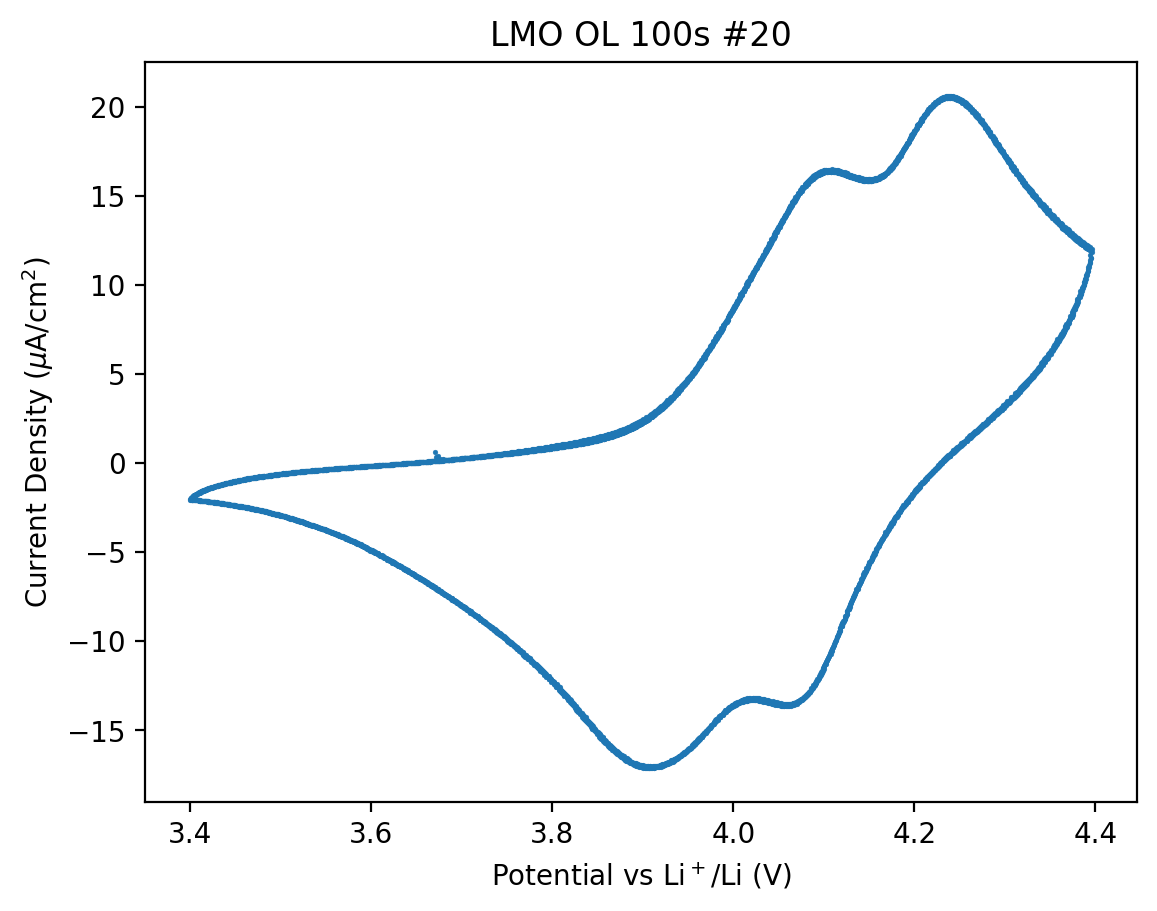

<Figure size 640x480 with 0 Axes>

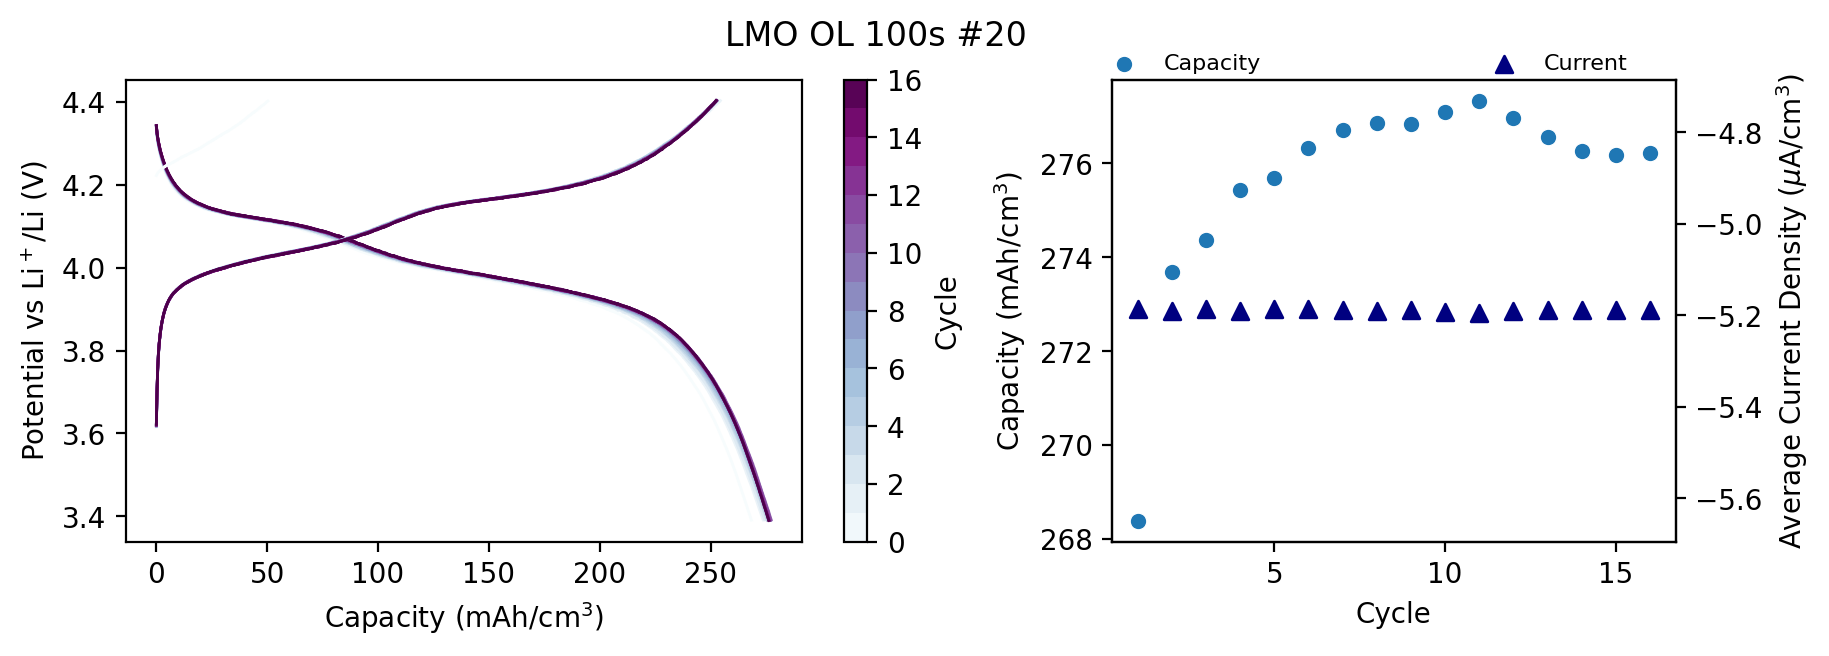

In [5]:
# =============================== LMO ==============================================================================================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\20 LMO OL 100s'
sample = 'LMO OL 100s #20'
df_cv_20, capacity_20, lith_20, delith_20 = Ec.Electrochem(path, 90, 0.12566, sample)

In [6]:
# df_cv_ref['Sample'] = 'Wet Cell'
# df_cv['Sample'] = 'Solid electrolyte'

# df = pd.concat([df_cv_ref, df_cv])

# fig, ax = plt.subplots(dpi = 200)
# sns.scatterplot(data = df, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'Sample', edgecolor = None, s = 5 )
# plt.title('TiO$_2$')

In [7]:
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\nanoSCE on LMO\nanoSCE prec 7\20230323_LMO_SCE\Sample 20 LMO OL 100s dep\CV 8 charge discharge set'
# df_cv = Ec.Electrochem(path, 80, 0.12566)

In [8]:
# fig, ax = plt.subplots(dpi = 200)
# sns.scatterplot(data = df_cv, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'CV', edgecolor = None, s = 5 )
# # plt.title('LMO')
# df_cv

In [9]:
# palette = 'Blues'
# dpi = 200
# lith = pd.DataFrame()
# cols = ['Potential vs Li$^+$/Li (V)', 'Current (A)', 'Current Density ($\mu$A/cm$^2$)', 'Scan']
# cols2 = ['Time (s)', cols[0], 'Current (A)', 'Charge (C)', 'Capacity (mAh cm$^{-3}$)']
# _cap = 'Capacity (mAh/cm$^3$)'
# area = 0.12566
# thickness = 80


# lith_path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\nanoSCE on LMO\nanoSCE prec 7\20230323_LMO_SCE\Sample 20 LMO OL 100s dep\CV 8 charge discharge set\lith'
# lith_files = [os.path.join(lith_path, j) for j in os.listdir(lith_path)]
# print(lith_files)
# Z = [[0,0],[0,0]]
# cbar = plt.contourf(Z, levels = np.arange(0, len(lith_files) + 1, 1), cmap=palette)
# plt.clf()
# n = 0
# capacity = pd.DataFrame(columns = [_cap, 'Cycle', 'Sample'])
# final_file = pd.DataFrame()
# for x in lith_files:
#     l = pd.read_csv(x, sep = ';', names = cols2, usecols=[1,2,3,4,5], skiprows = 1)
#     l['Cycle'] = int(x[-6:-4])
#     lith = pd.concat([lith, l], ignore_index = True)
#     capacity.loc[n] = [-1 * min(l[cols2[3]]) /3.6 / (area * 1e-7 * thickness), int(x[-6:-4]), path[-5:]] # capacity equation. capacity = charge / 3.6 / area * thickness (cm)
#     final_file = pd.concat([final_file, capacity])
#     n += 1
# lith[_cap] = -1 * lith[cols2[3]] /3.6 / (area * 1e-7 * thickness)
# fig, ax = plt.subplots(facecolor = 'white', dpi = dpi)
# sns.lineplot(data = lith, x = _cap, y = cols2[1], hue = 'Cycle', palette=palette, legend = True)
# plt.title('LMO with NanoSCE')
# #
# # sns.lineplot(data = delith, x = _cap, y = cols2[1], hue = 'Cycle', palette=palette, legend = False, ax = ax[0], lw = linewidth)

In [10]:
F = 96485.3321
def capacity(n, m_w, density):
    return n * F / (3600 * m_w) * density
    
a = 6.63e-8 / 0.12566
r = np.pi * 0.2**2

# print(capacity(0.5, 79.866, 4.23)*3600)

area = 0.12566
# area = 0.63
thickness = 40
tio2_qth = capacity(1, 79.866, 4.23)
print(tio2_qth)



# *3600*area*thickness * 1e-7

# prefact_tio2 = capacity(0.5, 79.866, 4.23) * 3600
# print(charge)
# current_1C = charge/3600
# print(current_1C)
# print(prefact_tio2)
# print(2555)

1.4195059877482286
